I have a lot imported but main function of this is to take csv files and load as one   

In [891]:
import os
import numpy as nm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
color_pal = sns.color_palette
#import pd.read_csv
os.getcwd()
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
from sklearn.utils import resample
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import load_model
#model = load_model('trained_model.h5')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import glob 

In [892]:
# bring in multipal files if .DS_store comes up go to terminal and type  cd /Users/davidpegoli/Desktop/liora_2022_Sales then find . -name '.DS_Store' -type f -delete last Is -ato check that it came off..


path_dir = '/Users/davidpegoli/Desktop/liora_2022_Sales/'
for files in os.listdir(path_dir):
   
    print(files)

weekly-sales-Liora-Baltimore-2022_04_01-2022_06_30.csv
weekly-sales-Liora-Baltimore-2022_10_01-2022_12_31.csv
weekly-sales-Liora-Baltimore-2022_01_01-2022_03_31.csv
weekly-sales-Liora-Baltimore-2022_07_01-2022_09_30.csv


In [893]:
liora = pd.DataFrame()
for files in os.listdir(path_dir):
   Datafram = pd.read_csv(path_dir+files)
   liora = pd.concat([liora,Datafram], ignore_index =  True)
    

#liora = pd.DataFrame()
#for files in os.listdir(path_dir):
   # d_parser = lambda x: pd.datetime.strptime(x,'%m/%d/%y %m/%d/%y')
   # Datafram = pd.read_csv(path_dir+files,parse_dates=['Week'], date_parser=d_parser)
    #liora = pd.concat([liora,Datafram], ignore_index = True)

#liora = pd.DataFrame()
#for file in os.listdir(path_dir):
    #Datafram = pd.read_csv(path_dir+file)
    #Datafram['start_date'] = pd.to_datetime(Datafram['Week'].str.split(' - ').str[0], format='%m/%d/%y')
    #Datafram['end_date'] = pd.to_datetime(Datafram['Week'].str.split(' - ').str[1], format='%m/%d/%y')
    #Datafram['week'] = pd.date_range(start=Datafram['start_date'], end=Datafram['end_date'], freq='7D')
    #Datafram.drop(['Week', 'start_date', 'end_date'], axis=1, inplace=True)
   # liora = pd.concat([liora, Datafram], ignore_index=True)


In [894]:
liora

,Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Week Total
0,4/4/22 - 4/10/22,765.20,"1,222.95","3,007.00","1,677.70","4,992.96","6,148.40","4,314.40","22,128.61"
1,4/11/22 - 4/17/22,"1,494.40","1,740.00","1,481.70","1,380.50","4,453.45","3,985.90","3,581.70","18,117.65"
2,4/18/22 - 4/24/22,"1,087.00","2,174.90","1,965.01","1,065.00","2,551.00","5,377.36","3,883.50","18,103.77"
3,4/25/22 - 5/1/22,"1,266.80","1,169.00","2,459.00","2,032.20","2,535.75","4,388.00","3,784.50","17,635.25"
4,5/2/22 - 5/8/22,"1,278.00","1,838.70","1,627.10","1,373.00","2,940.90","6,321.91","6,801.50","22,181.11"
5,5/9/22 - 5/15/22,"1,103.00","1,398.00","3,124.10","1,091.40","2,133.00","5,451.50","3,737.50","18,038.50"
6,5/16/22 - 5/22/22,"2,563.00","1,422.00","1,220.00","1,568.00","4,511.00","5,179.60","4,257.35","20,720.95"
7,5/23/22 - 5/29/22,"1,318.00","1,408.00","2,114.35","1,192.10","2,528.01","4,453.40","5,383.75","18,397.61"
8,5/30/22 - 6/5/22,"1,190.00","2,108.00",441.00,"1,250.00","1,982.00","3,777.00","2,065.00","12,813.00"
9,6/6/22 - 6/12/22,587.00,"2,131.30","1,107.00","1,871.50","3,406.80","3,494.30","5,480.66","18,078.56"


In [895]:
import datetime

In [896]:
#d_parser = lambda x: pd.datetime.strptime(x,'%m/%d/%y''%m/%d/%y')
##liora = pd.read_csv('/Users/davidpegoli/Desktop/weekly-sales-Liora-Baltimore-2022_10_01-2022_12_31.csv')
#date_parser=lambda x:datetime_strptime(x,'%m/%d/%y''%m/%d/%y')
#liora =liora.drop([0])
#liora["Week"] = liora["Week"].str.split(' ').str[0]
#d_parser = lambda x: pd.datetime.strptime(x,'%m/%d/%y''%m/%d/%y')
#date_parser=lambda x:datetime_strptime(x,'%m/%d/%y''%m/%d/%y')
#liora["Week"] = pd.to_datetime(liora["Week"], format='%m/%d/%y')
liora["Week"] = liora["Week"].str.split(' ').str[0]
liora["Week"] = pd.to_datetime(liora["Week"], format='%m/%d/%y')



liora
#liora

,Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Week Total
0,2022-04-04,765.20,"1,222.95","3,007.00","1,677.70","4,992.96","6,148.40","4,314.40","22,128.61"
1,2022-04-11,"1,494.40","1,740.00","1,481.70","1,380.50","4,453.45","3,985.90","3,581.70","18,117.65"
2,2022-04-18,"1,087.00","2,174.90","1,965.01","1,065.00","2,551.00","5,377.36","3,883.50","18,103.77"
3,2022-04-25,"1,266.80","1,169.00","2,459.00","2,032.20","2,535.75","4,388.00","3,784.50","17,635.25"
4,2022-05-02,"1,278.00","1,838.70","1,627.10","1,373.00","2,940.90","6,321.91","6,801.50","22,181.11"
5,2022-05-09,"1,103.00","1,398.00","3,124.10","1,091.40","2,133.00","5,451.50","3,737.50","18,038.50"
6,2022-05-16,"2,563.00","1,422.00","1,220.00","1,568.00","4,511.00","5,179.60","4,257.35","20,720.95"
7,2022-05-23,"1,318.00","1,408.00","2,114.35","1,192.10","2,528.01","4,453.40","5,383.75","18,397.61"
8,2022-05-30,"1,190.00","2,108.00",441.00,"1,250.00","1,982.00","3,777.00","2,065.00","12,813.00"
9,2022-06-06,587.00,"2,131.30","1,107.00","1,871.50","3,406.80","3,494.30","5,480.66","18,078.56"


In [897]:


print(liora['Week'].dtype)

datetime64[ns]


In [898]:
liora['Wednesday']=liora['Wednesday'].replace('[\$\,]','',regex=True).astype(float)

In [899]:
liora[['Thursday','Friday','Saturday','Sunday','Week Total']]=liora[['Thursday','Friday','Saturday','Sunday','Week Total']].replace('[\$\,]','',regex=True).astype(float)

In [900]:
liora.dtypes

Week          datetime64[ns]
Monday                object
Tuesday               object
Wednesday            float64
Thursday             float64
Friday               float64
Saturday             float64
Sunday               float64
Week Total           float64
dtype: object

In [901]:
liora[['Monday','Tuesday']]=liora[['Monday','Tuesday']].replace('[\$\,]','',regex=True).astype(float)

In [902]:
liora.dtypes

Week          datetime64[ns]
Monday               float64
Tuesday              float64
Wednesday            float64
Thursday             float64
Friday               float64
Saturday             float64
Sunday               float64
Week Total           float64
dtype: object

In [903]:
liora=liora
index_col=[0]
parse_dates=[0]

In [904]:
#from prophet import Prophet
#import seaborn as sns
#from sklearn.metrics import mean_squared_error, mean_absolute_error

#import warnings
##warnings.filterwarnings("ignore")

#plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
#def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

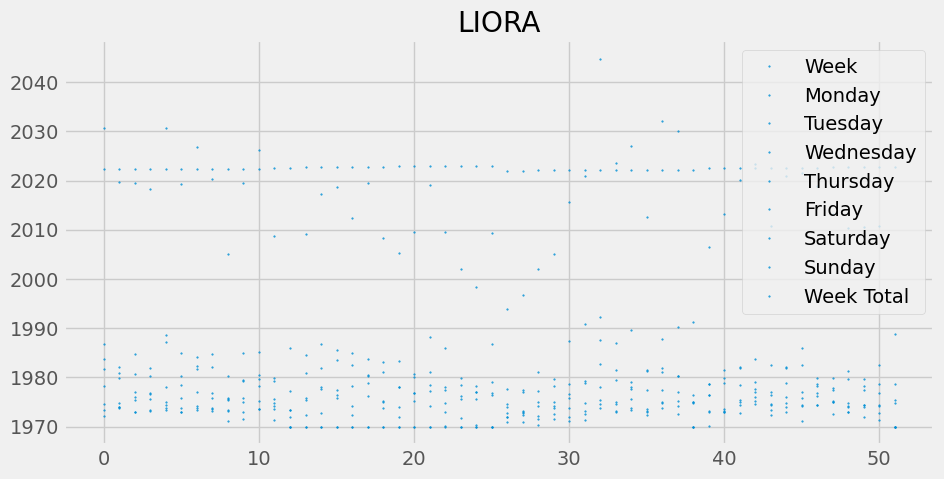

In [906]:
#color_pal = sns.color_palette()
#liora.plot(style='.',
          #figsize=(10, 5),
          #ms=1,
          #color=color_pal[0],
          ##title='LIORA')
#plt.show()

In [907]:
#from pandas.api.types import CategoricalDtype

#cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

#def create_features(df, label=None):
    """
    #Creates time series features from datetime index.
    """
    #df = df.copy()
   # df['date'] = df.index
    #df['hour'] = df['date'].dt.hour
    #df['dayofweek'] = df['date'].dt.dayofweek
    #df['weekday'] = df['date'].dt.day_name()
    #df['weekday'] = df['weekday'].astype(cat_type)
    #df['quarter'] = df['date'].dt.quarter
    #df['month'] = df['date'].dt.month
    #df['year'] = df['date'].dt.year
    #df['dayofyear'] = df['date'].dt.dayofyear
    #df['dayofmonth'] = df['date'].dt.day
    #df['weekofyear'] = df['date'].dt.weekofyear
    #df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

   # df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    #X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekday',
           'season']]
    #if label:
       # y = df[label]
       # return X, y
    ##return X
#x, y = create_features(liora, label='LIORA')
#features_and_target = pd.concat([X, y], axis=1)

AttributeError: Can only use .dt accessor with datetimelike values